In [20]:
import subprocess
import sys
import os
from IPython.display import clear_output
import csv
import pandas as pd

In [27]:
def exec_threads(version):
    times = []
    for threads in range(1,51):
        clear_output(wait=True)
        print(f"Current version: {version}")
        print("Threads:", threads)
        output = subprocess.check_output(f"/home/xbit18/.pyenv/versions/{version}/bin/python fib.py {threads}", shell=True)
        tm = float(output.decode(sys.stdout.encoding).replace('\n',''))
        times.append(tm)
    return times

In [29]:
versions = ["3.9.18","nogil-3.9.10-1","3.10.13","3.11.8","3.12.2"]
times={}
for version in versions:
    if "nogil" in version:
        for val in [0,1]:
            os.environ["PYTHONGIL"] = str(val)
            version_str = f"3.9-nogil_{val}"
            tms = exec_threads(version)
            times[f"{version_str}"] = tms
            with open("times.csv", "a") as csv_file:
                writer = csv.writer(csv_file, delimiter=',')
                to_insert = []
                to_insert.append(version_str)
                to_insert.extend(tms)
                writer.writerow(to_insert)
    else:
        times[f"{version}"] = exec_threads(version)
        with open("times.csv", "a") as csv_file:
            writer = csv.writer(csv_file, delimiter=',')
            to_insert = []
            to_insert.append(version)
            to_insert.extend(times[version])
            writer.writerow(to_insert)

Current version: 3.12.2
Threads: 4


In [4]:
import pandas as pd
import numpy as np

In [5]:
arr = np.genfromtxt('times.csv',delimiter=',',dtype=str)

In [6]:
df = pd.DataFrame(arr.T)

In [7]:
new_header = df.iloc[0] #grab the first row for the header
df = df[1:] #take the data less the header row
df.columns = new_header #set the header row as the df header

In [8]:
df

,3.9.18,3.9-nogil_0,3.9-nogil_1,3.10.13,3.11.8,3.12.2
1,2.015,0.8,0.788,2.07,1.123,1.005
2,3.793,0.787,1.564,4.189,2.206,2.012
3,5.638,0.79,2.329,6.25,3.319,3.01
4,7.56,0.824,3.095,8.602,4.466,4.168


In [10]:
import matplotlib.pyplot as plt
import matplotlib
import multiprocessing

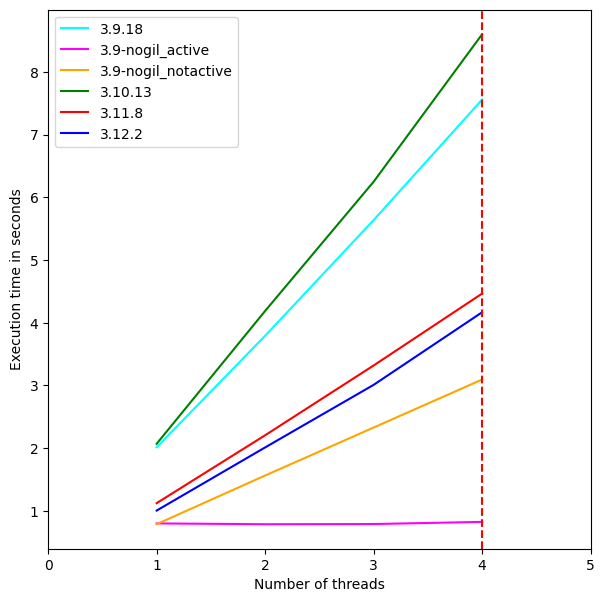

In [23]:
plt.figure(figsize=(7,7))
columns = list(df.columns)
for col in range(len(columns)):
    val = columns[col].replace("nogil_0","nogil_active").replace("nogil_1","nogil_notactive")
    columns[col]=val

colors = "blue,red,green,orange,magenta,cyan".split(",")
for col in df.columns:
    vals = list(df[col].astype(float))
    plt.plot(list(range(1,51)), vals, color=colors.pop())
plt.axvline(x = multiprocessing.cpu_count(), color = 'r', linestyle = '--') 
plt.xlabel("Number of threads")
plt.ylabel("Execution time in seconds")
plt.legend(columns)
plt.xlim((0,51))
#plt.savefig("graph.png", transparent=False)
plt.show()